<a href="https://colab.research.google.com/github/wjdgoruds2/AI-_assignment/blob/master/RBF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

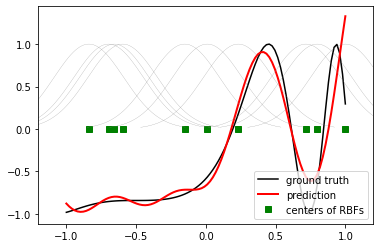

In [15]:
from scipy import *
from scipy.linalg import norm,pinv
from matplotlib import pyplot as plt
import numpy as np

class RBF:
  def __init__(self,indim,numCenters,outdim):
    self.indim=indim; self.outdim=outdim; self.numCenters=numCenters
    self.centers=[random.uniform(-1,1,indim) for i in range(numCenters)]
    self.beta=8
    self.W=random.random((self.numCenters,self.outdim))
  def basicFunc(self,c,d):
    assert len(d)==self.indim
    return np.exp(-self.beta *norm(c-d)**2)

  def activationFunc(self,X):
    G=np.zeros((X.shape[0],self.numCenters),float)
    for ci,c, in enumerate(self.centers):
      for xi,x in enumerate(X):
        G[xi,ci]=self.basicFunc(c,x)
    return G

  def train(self,X,Y):
    rnd_idx=random.permutation(X.shape[0])[:self.numCenters]
    self.centers=[X[i,:] for i in rnd_idx]
    G=self.activationFunc(X)
    self.W=np.dot(pinv(G),Y)

  def predict(self,X):
    G=self.activationFunc(X)
    Y=np.dot(G,self.W)
    return Y
n=100
x=mgrid[-1:1:complex(0,n)].reshape(n,1)
y=np.sin(3*(x+0.5)**3-1)

rbf=RBF(1,10,1)
rbf.train(x,y)
z=rbf.predict(x)

plt.figure(figsize=(6,4))
plt.plot(x,y,'k-',label='ground truth')
plt.plot(x,z,'r-',linewidth=2,label='prediction')
plt.plot(rbf.centers,np.zeros(rbf.numCenters),'gs',label='centers of RBFs')

for c in rbf.centers:
  cx=np.arange(c-0.7,c+0.7,0.01)
  cy=[rbf.basicFunc(np.array(cx_),np.array([c])) for cx_ in cx]
  plt.plot(cx,cy,'-',color='gray',linewidth=0.2)

plt.xlim(-1.2,1.2)
plt.legend()
plt.show()


In [ ]:
sle